In [89]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [90]:
from PIL import Image


In [91]:
TRAIN_DIR  = 'images/train'
TEST_DIR  = 'images/test'

In [92]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels


In [93]:
train = pd.DataFrame()
train['image'],train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [94]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [95]:
test = pd.DataFrame()
test['image'],test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [96]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [97]:
from tqdm.notebook import tqdm
from PIL import Image
import numpy as np

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = Image.open(image).convert('L')              # Convert to grayscale
        img = img.resize((48, 48))                         # Resize to 48x48
        img = np.array(img, dtype='float32') / 255.0       # Normalize
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [99]:
train_features = extract_features(train['image'])  # ✅ Will show tqdm bar like in your image

  0%|          | 0/28821 [00:00<?, ?it/s]

In [98]:
test_features = extract_features(test['image'])  # ✅ Will show tqdm bar like in your image


  0%|          | 0/7066 [00:00<?, ?it/s]

In [100]:
x_train = train_features
x_test = test_features

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
le  = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [104]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [105]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [106]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten and fully connected layers
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

C:\Users\MIMIN CHANDRAN K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [109]:
model.fit(x = x_train,y = y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 122s 536ms/step - accuracy: 0.2302 - loss: 1.8367 - val_accuracy: 0.2583 - val_loss: 1.8090
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 127s 562ms/step - accuracy: 0.2492 - loss: 1.8122 - val_accuracy: 0.2639 - val_loss: 1.7937
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 133s 589ms/step - accuracy: 0.2646 - loss: 1.7794 - val_accuracy: 0.3248 - val_loss: 1.6672
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 128s 568ms/step - accuracy: 0.3171 - loss: 1.6897 - val_accuracy: 0.4005 - val_loss: 1.5339
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 151s 667ms/step - accuracy: 0.3788 - loss: 1.5850 - val_accuracy: 0.4294 - val_loss: 1.4579
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 172s 762ms/step - accuracy: 0.4127 - loss: 1.5064 - val_accuracy: 0.4789 - val_loss: 1.3600
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 168s 745ms/step - accuracy: 0.4412 - loss: 1.4428 - val_accuracy: 0.4917 - val_loss: 1.3226
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 134s 595ms/step - accuracy: 

In [132]:
# Save model architecture to JSON
model_json = model.to_json()
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model_json)

# Save full model (architecture + weights)
model.save("emotiondetector.h5")


In [133]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [134]:
from PIL import Image  # <- this ensures PIL is actually loaded
import numpy as np


In [135]:
from PIL import Image

def ef(image):
    img = Image.open(image).convert('L')   # Convert to grayscale
    img = img.resize((48, 48))              # Resize to 48x48
    feature = np.array(img, dtype='float32') / 255.0
    feature = feature.reshape(1, 48, 48, 1)
    return feature


In [137]:
image = 'images/train/angry/27.jpg'
print("original image is of angry")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("model prediction is", pred_label)


original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
model prediction is angry


In [139]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("model prediction is", pred_label)


original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
model prediction is sad


In [143]:
import matplotlib.pyplot as plt 
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
model prediction is sad


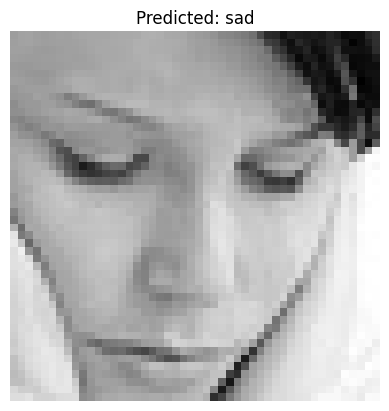

In [144]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("model prediction is", pred_label)

# Show the grayscale image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Predicted: {pred_label}")
plt.axis('off')
plt.show()


original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
model prediction is fear


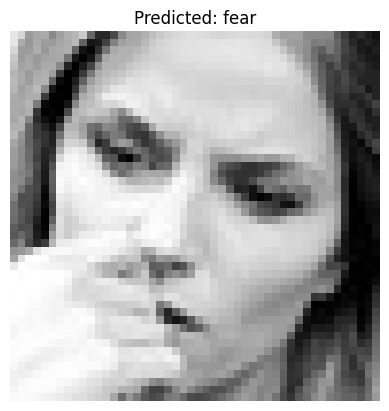

In [145]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("model prediction is", pred_label)

# Show the grayscale image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Predicted: {pred_label}")
plt.axis('off')
plt.show()


original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
model prediction is disgust


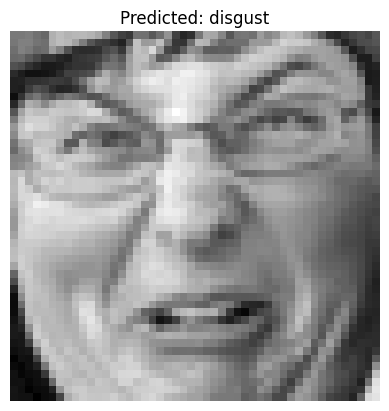

In [146]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("model prediction is", pred_label)

# Show the grayscale image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Predicted: {pred_label}")
plt.axis('off')
plt.show()


original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
model prediction is happy


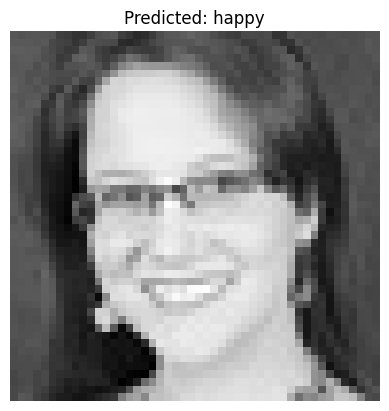

In [147]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("model prediction is", pred_label)

# Show the grayscale image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Predicted: {pred_label}")
plt.axis('off')
plt.show()


original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
model prediction is surprise


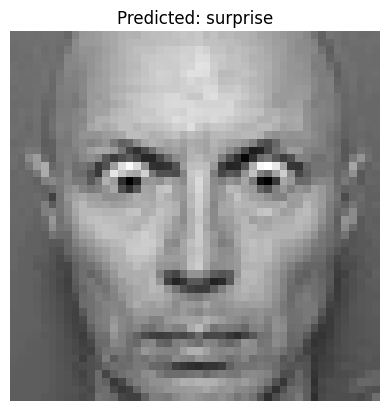

In [148]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")

img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("model prediction is", pred_label)

# Show the grayscale image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Predicted: {pred_label}")
plt.axis('off')
plt.show()
